In [33]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy .spatial.distance import pdist, squareform
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

<h3>Installing library for apply Maximal Information Coefficient (MIC)</h3>

In [2]:
pip install minepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minepy: filename=minepy-1.2.6-cp310-cp310-linux_x86_64.whl size=187030 sha256=7413483df0d41548eeee7df9289db2cd742f2341daa9dc3104fbc1a30da18b3c
  Stored in directory: /root/.cache/pip/wheels/69/38/a6/825bb9b9ed81e6af43a0ef80c7cfe4cafcfdbc2f5cde2959d9
Successfully built minepy


In [3]:
#importing the library
from minepy import MINE

In [4]:
#path of the file
path='/path/to/info.csv'
Data=pd.read_csv(path)
Data.head()


,X_Parameter,MART-1,CD66b,TRIPTASA,CD68,Y_Parameter,Circ.,NUCLEI,CD8,CD4,CD56,HLA-DR,CD11c,SampleID
0,3966.60,131.017,200.137,27.077,408.709,3.264,0.968,339.624,184.350,0.000,255.932,249.803,119.350,1
1,3669.74,224.746,55.996,119.623,311.127,10.828,0.935,1792.620,135.254,0.932,296.775,314.983,162.847,1
2,4394.55,101.195,189.247,16.753,313.247,10.372,1.000,1445.270,58.117,0.610,203.727,213.831,238.961,1
3,4467.72,102.165,80.287,16.848,261.174,16.239,1.000,1699.920,78.902,0.549,236.665,218.530,191.704,1
4,3658.52,120.902,52.546,18.481,201.973,17.698,1.000,1102.670,99.311,0.049,172.404,240.546,116.831,1


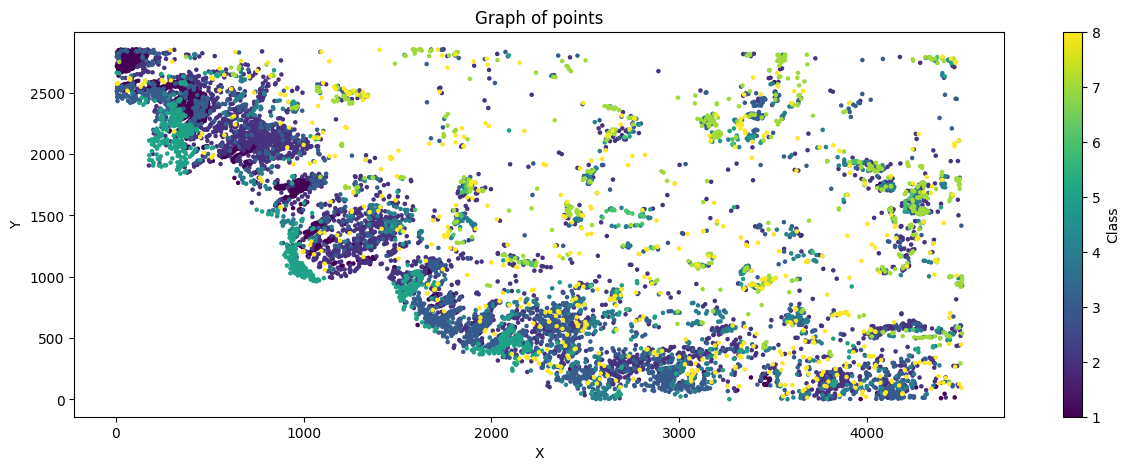

In [5]:
#ploting data
plt.figure(figsize=(15,5))
scatter=plt.scatter(Data['X_Parameter'],Data['Y_Parameter'],c=Data['SampleID'],cmap='viridis',s=5)
plt.colorbar(scatter,label='Class')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graph of points')
plt.show()

<h2><b>The problem</b></h2>

We have different cumulus of points in the XY plane, each point is defined by it's coordinates $(x_i,y_i)$ and each point has an associate class $C_i$ for $1\leqslant i \leqslant 9$ and we need to find metrics that help us to know information about the clusters.


<h2><b>Standar deviation</b></h2>

First, lets calculate the standar deviation for the x's and y's coordinates for each class, to know the sparse of point coordinates by class, so for each $C_i$:

$$\displaystyle \sigma_x^2= \frac{1}{|C_i|}\sum_{x_i\in C_i}(x_i-\bar{x})^2$$

$$\displaystyle \sigma_y^2= \frac{1}{|C_i|}\sum_{y_i\in C_i}(y_i-\bar{x})^2$$

where

$$\bar{x}=\frac{1}{|C_i|}\sum_{x_i\in C_i}x_i \text{ and } \bar{y}=\frac{1}{|C_i|}\sum_{y_i\in C_i}y_i$$

is the mean

In [6]:
#calculating standar deviation per class
std_class=Data.groupby('SampleID')[['X_Parameter','Y_Parameter']].std()
print("Standar deviation per class")
print(std_class)

Standar deviation per class
          X_Parameter  Y_Parameter
SampleID                          
1          784.607751   689.937659
2         1268.811184   791.729689
3         1167.756983   885.821198
4         1134.153950   749.217679
5         1201.437765   757.832375
6          978.791214   519.332563
7         1090.250351   663.967025
8         1148.925547   828.664347


<h2>Centroids</h2>
Plotting the centroids (means) by class for each comulus

In [7]:
centroids=Data.groupby('SampleID')[['X_Parameter','Y_Parameter']].mean()
print("Centroids per class")
print(centroids)

Centroids per class
          X_Parameter  Y_Parameter
SampleID                          
1          740.216779  2044.039051
2         1993.102276  1343.362946
3         2202.063884  1070.939517
4         2641.313636  1073.300200
5         1650.583428  1313.921714
6         2984.110957  1553.516989
7         3074.653739  1802.989869
8         2673.890787  1213.195910


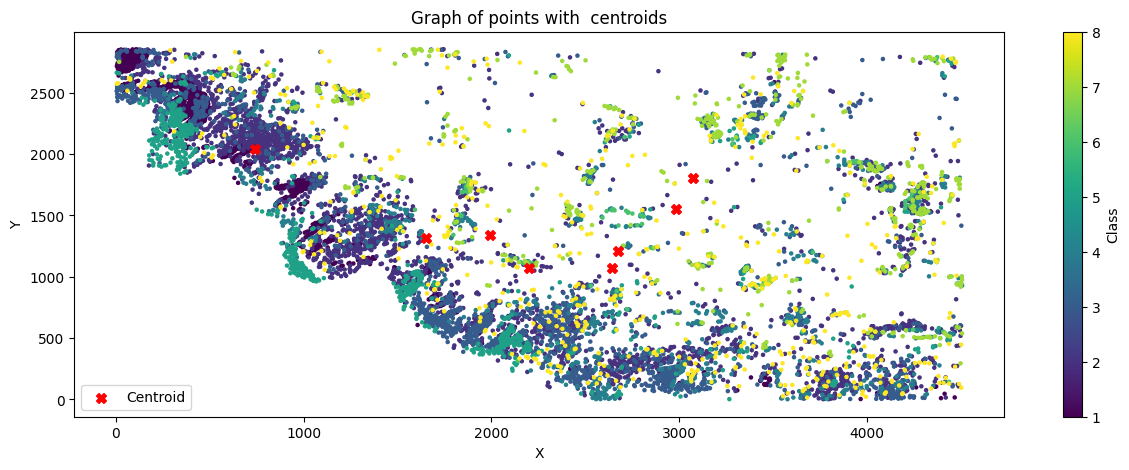

In [8]:
#ploting data
plt.figure(figsize=(15,5))
scatter=plt.scatter(Data['X_Parameter'],Data['Y_Parameter'],c=Data['SampleID'],cmap='viridis',s=5)
plt.colorbar(scatter,label='Class')
#add centroids
plt.scatter(centroids['X_Parameter'],centroids['Y_Parameter'],color='red',marker='X',s=50,label='Centroid')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graph of points with  centroids')
plt.legend()
plt.show()

<h2>Dispersion ratio</h2>

Lets determine the dispertion ratio, ie, the maximun distance between the centroid and the points of the comulus:

For each $(x_i,y_i)\in C_i$

$$R_i=\max_{(x_i,y_i)\in C_i}\{\sqrt{(x_i-\bar{x})^2+(y_i-\bar{y})^2}\}$$

In [9]:
#Let´s define a functio to compute the distance between the poits and its centroid
def comp_dist(row):
  centroid=centroids.loc[row['SampleID']]
  d=np.sqrt((row['X_Parameter']-centroid['X_Parameter'])**2+(row['Y_Parameter']-centroid['Y_Parameter'])**2)
  return d

In [10]:
#Let´s compute distance
Data['dist_centroid']=Data.apply(comp_dist,axis=1)
#Taking the maximun distance
disp_ratio=Data.groupby('SampleID')['dist_centroid'].max()

In [11]:
#Looking table with distances to the centroid include
Data.head()

,X_Parameter,MART-1,CD66b,TRIPTASA,CD68,Y_Parameter,Circ.,NUCLEI,CD8,CD4,CD56,HLA-DR,CD11c,SampleID,dist_centroid
0,3966.60,131.017,200.137,27.077,408.709,3.264,0.968,339.624,184.350,0.000,255.932,249.803,119.350,1,3817.631661
1,3669.74,224.746,55.996,119.623,311.127,10.828,0.935,1792.620,135.254,0.932,296.775,314.983,162.847,1,3565.957582
2,4394.55,101.195,189.247,16.753,313.247,10.372,1.000,1445.270,58.117,0.610,203.727,213.831,238.961,1,4182.099110
3,4467.72,102.165,80.287,16.848,261.174,16.239,1.000,1699.920,78.902,0.549,236.665,218.530,191.704,1,4243.377583
4,3658.52,120.902,52.546,18.481,201.973,17.698,1.000,1102.670,99.311,0.049,172.404,240.546,116.831,1,3552.823067


In [13]:
print('Dispertion Ratio per class (maximun distance):')
print(disp_ratio)

Dispertion Ratio per class (maximun distance):
SampleID
1    4243.377583
2    2825.386142
3    2806.653256
4    3000.820585
5    3150.994239
6    2147.077053
7    3201.144128
8    2995.922024
Name: dist_centroid, dtype: float64


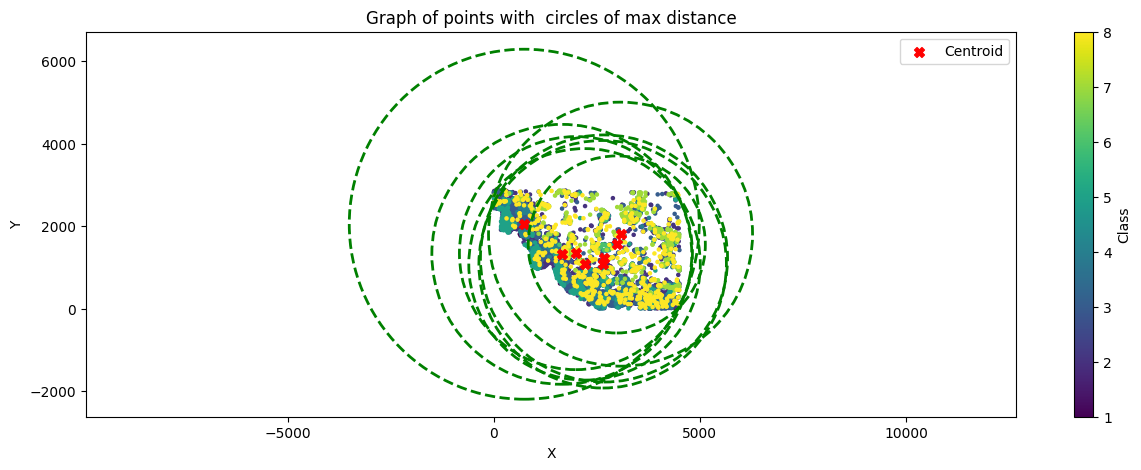

In [14]:
#ploting data
plt.figure(figsize=(15,5))
scatter=plt.scatter(Data['X_Parameter'],Data['Y_Parameter'],c=Data['SampleID'],cmap='viridis',s=5)
plt.colorbar(scatter,label='Class')
#add centroids
plt.scatter(centroids['X_Parameter'],centroids['Y_Parameter'],color='red',marker='X',s=50,label='Centroid')
#add the circles with maximun ratio for each cetroid
for clas, (x,y) in centroids.iterrows():
  r=disp_ratio[clas]
  circle=plt.Circle((x,y),r,color='green',fill=False,linestyle='--',linewidth=2,label=f'Ratio class {clas}' if clas==0 else None)
  plt.gca().add_patch(circle)
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.title('Graph of points with  circles of max distance')
plt.legend()
plt.show()

<h2>Cohetion</h2>
Let's measure the cohetion by class, ie, the mean of distance ratios from the centroid for each class this metric give us an idead about the concentration of the points arount the centroid, for each $(x_i,y_i)\in C_i$:
$$CH_i=\frac{1}{|C_i|}\sum_{(x_i,y_i)\in C_i}\sqrt{(x_i-\bar{x})^2+(y_i-\bar{y})^2}$$

In [15]:
ch=Data.groupby('SampleID')['dist_centroid'].mean()
print("Cohetion by class")
ch

Cohetion by class


,dist_centroid
SampleID,
1,794.237534
2,1361.988544
3,1284.770990
4,1219.858662
5,1273.306500
6,991.706116
7,1169.882285
8,1287.148168


In [16]:
print("Cohetion total:")
print(Data['dist_centroid'].mean())

Cohetion total:
1211.6020359128654


<h2>Separation</h2>
Let's compute the separation between the comulus, ie, the distance between each comulus centroid respect the centrod 1 witch is the centroid of interest:

$$S_{i,j}= \sqrt{(c^i_1-c^j_1)^2+(c^i_2-c^j_2)^2}$$

where $(c^i_1,c^i_2)$, $(c^j_1,c^j_2)$ are the coordinates for the centroid with $i\neq j$

In [17]:
centroid1=centroids.iloc[0]
centroids['dist_centroid0_n']=np.sqrt((centroids['X_Parameter']-centroid1['X_Parameter'])**2+(centroids['Y_Parameter']-centroid1['Y_Parameter'])**2)
print('Distance from centroid 1 to the others')
print(centroids['dist_centroid0_n'])

Distance from centroid 1 to the others
SampleID
1       0.000000
2    1435.503073
3    1756.109239
4    2134.596725
5    1166.978475
6    2296.883318
7    2346.849085
8    2104.612908
Name: dist_centroid0_n, dtype: float64


In [18]:
#Let´s compute the euclidean distance between all the centroids

#array with coordinates
centroids_coord=centroids[['X_Parameter','Y_Parameter']].values

#compute all the euclidean distances bitween the centroids
distances=pdist(centroids_coord,metric='euclidean')

#let´s put the info in matrix form
distance_matrix=squareform(distances)

#let´s create df with the info

distances_DF=pd.DataFrame(distance_matrix,columns=centroids.index,index=centroids.index)

print("Distances between each centroid")
distances_DF

Distances between each centroid


SampleID,1,2,3,4,5,6,7,8
SampleID,,,,,,,,
1,0.000000,1435.503073,1756.109239,2134.596725,1166.978475,2296.883318,2346.849085,2104.612908
2,1435.503073,0.000000,343.335810,702.219235,343.781831,1013.046361,1175.164021,693.120808
3,1756.109239,343.335810,0.000000,439.256096,602.636741,918.955191,1138.995511,492.805751
4,2134.596725,702.219235,439.256096,0.000000,1019.531784,590.015397,848.664043,143.638715
5,1166.978475,343.781831,602.636741,1019.531784,0.000000,1354.880648,1505.710434,1028.252712
6,2296.883318,1013.046361,918.955191,590.015397,1354.880648,0.000000,265.395390,460.494290
7,2346.849085,1175.164021,1138.995511,848.664043,1505.710434,265.395390,0.000000,713.069322
8,2104.612908,693.120808,492.805751,143.638715,1028.252712,460.494290,713.069322,0.000000


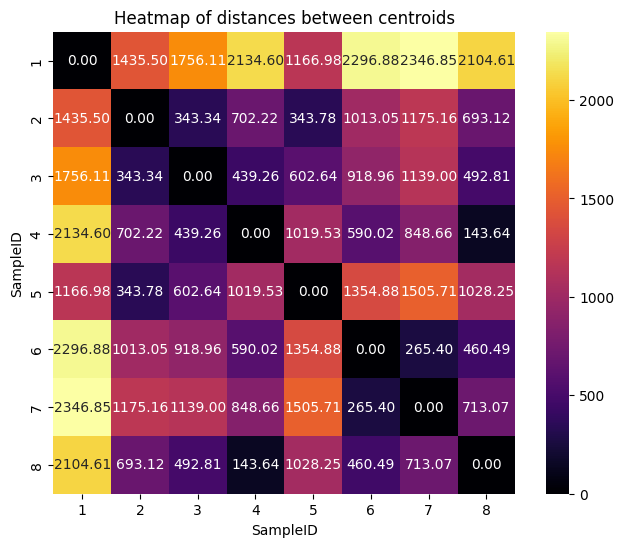

In [19]:
#Let´s see the distances in form of headmap of distances
plt.figure(figsize=(8,6))
sns.heatmap(distances_DF, annot=True,cmap='inferno',cbar=True,fmt='.2f',square=True)
plt.title('Heatmap of distances between centroids')
plt.show()

<h2>Dunn index</h2>
Computing the Dunn index, using to evaluate the culster relation, is computed as the ratio between the separtion for each class and the maximun of the comulus ratios:

$$Dn_{i,j}=\frac{S_{i,j}}{\max\{D_i,D_j\}}$$

$Dn_{i,j}\to 0 $ if there is bad separation

$Dn_{i,j}\to 1 $ if there is good separation


In [20]:
for i in range(8):
    print(f'Dunn index for cluster 1 to cluster {i+1}:')
    print()
    dnij=centroids['dist_centroid0_n'].iloc[i]/max(disp_ratio.iloc[i],disp_ratio.iloc[0])
    print(dnij)
    print()

Dunn index for cluster 1 to cluster 1:

0.0

Dunn index for cluster 1 to cluster 2:

0.3382925616655567

Dunn index for cluster 1 to cluster 3:

0.41384703697170167

Dunn index for cluster 1 to cluster 4:

0.5030419007022779

Dunn index for cluster 1 to cluster 5:

0.27501169813684495

Dunn index for cluster 1 to cluster 6:

0.5412865749890177

Dunn index for cluster 1 to cluster 7:

0.5530615740663193

Dunn index for cluster 1 to cluster 8:

0.49597587469999055



In [21]:
dn_df = pd.DataFrame(columns=centroids.index,index=centroids.index)

for i,row in distances_DF.iterrows():
  for j, value in row.items():
    dnij= value/max(disp_ratio.iloc[i-1],disp_ratio.iloc[j-1])
    dn_df.loc[i,j] = float(dnij)
dn_df = dn_df.astype(float)

In [22]:
print("Dunn index between each cluster")
dn_df

Dunn index between each cluster


SampleID,1,2,3,4,5,6,7,8
SampleID,,,,,,,,
1,0.000000,0.338293,0.413847,0.503042,0.275012,0.541287,0.553062,0.495976
2,0.338293,0.000000,0.121518,0.234009,0.109103,0.358551,0.367108,0.231355
3,0.413847,0.121518,0.000000,0.146379,0.191253,0.327420,0.355809,0.164492
4,0.503042,0.234009,0.146379,0.000000,0.323559,0.196618,0.265113,0.047866
5,0.275012,0.109103,0.191253,0.323559,0.000000,0.429985,0.470366,0.326326
6,0.541287,0.358551,0.327420,0.196618,0.429985,0.000000,0.082906,0.153707
7,0.553062,0.367108,0.355809,0.265113,0.470366,0.082906,0.000000,0.222755
8,0.495976,0.231355,0.164492,0.047866,0.326326,0.153707,0.222755,0.000000


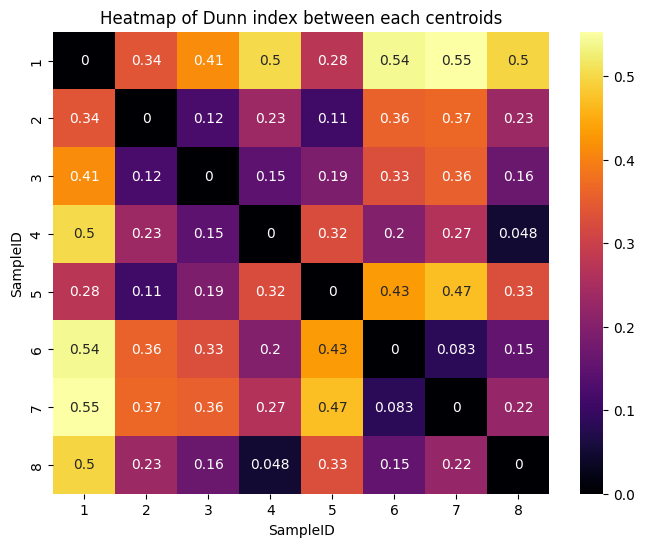

In [23]:
#Let´s see the dunn index in form of headmap of distances
plt.figure(figsize=(8,6))
sns.heatmap(dn_df, annot=True, cmap="inferno", cbar=True)
plt.title('Heatmap of Dunn index between each centroids')
plt.show()

<h2>Silhouette Score</h2>

Let's compute the Silhouette Score that evaluates the consistency in a cluster system, it can be calculate as:

$$S(i)=\frac{b(i)-a(i)}{max\{a(i),b(i)\}}$$

where $a(i)$ is the cohetion  and $b(i)$ the separation in terms of this score we have:

$$s(i)\to 1 \text{ clustered}$$

$$s(i)\to 0 \text{  if the cluster have overlap}$$

$$s(i) \text{ negative  if don't have culster}$$


In [24]:
SS_df=pd.DataFrame(columns=centroids.index,index=centroids.index)
for index, row in distances_DF.iterrows():
    ai=ch.iloc[index-1]
    for j,element in enumerate(row):

      SSij=(element -ai)/max(element,ai)
      SS_df.loc[index,j+1]=float(SSij)
SS_df=SS_df.astype(float)

In [25]:
SS_df

SampleID,1,2,3,4,5,6,7,8
SampleID,,,,,,,,
1,-1.000000,0.446718,0.547729,0.627922,0.319407,0.654211,0.661573,0.622621
2,0.051212,-1.000000,-0.747916,-0.484416,-0.747588,-0.256201,-0.137170,-0.491096
3,0.268399,-0.732765,-1.000000,-0.658106,-0.530938,-0.284732,-0.113464,-0.616425
4,0.428530,-0.424344,-0.639912,-1.000000,-0.164221,-0.516325,-0.304293,-0.882250
5,-0.083505,-0.730009,-0.526715,-0.199304,-1.000000,0.060208,0.154348,-0.192455
6,0.568238,0.021065,-0.073359,-0.405050,0.268049,-1.000000,-0.732385,-0.535654
7,0.501509,0.004494,-0.026402,-0.274573,0.223036,-0.773144,-1.000000,-0.390478
8,0.388416,-0.461507,-0.617134,-0.888405,-0.201139,-0.642237,-0.446008,-1.000000


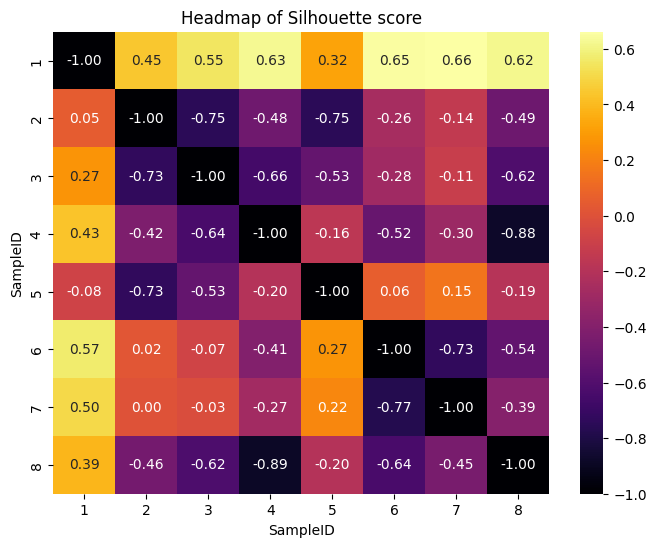

In [26]:
#Let's see Silhouette score as heatmap
plt.figure(figsize=(8,6))
sns.heatmap(SS_df,annot=True,cmap='inferno',cbar=True,fmt='.2f')
plt.title("Headmap of Silhouette score")
plt.show()

<h2>DBSCAN</h2>

Let's try to aply DBSCAN algorithm to try to determine cluster automatically, this algorithm work fine for irregular regions with some kind of noice, we only need to define:

eps: the minimun distance between points to be considered of the zame cluster.

min_samples: minumun nomber pf points to form a cluster




In [27]:
coords = Data[['X_Parameter', 'Y_Parameter']].values

#Scaling Data
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

#Appliying DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=70)  # Ajust params
labels_dbscan = dbscan.fit_predict(coords_scaled)

#Add results to the DataFrame
Data['cluster_dbscan'] = labels_dbscan

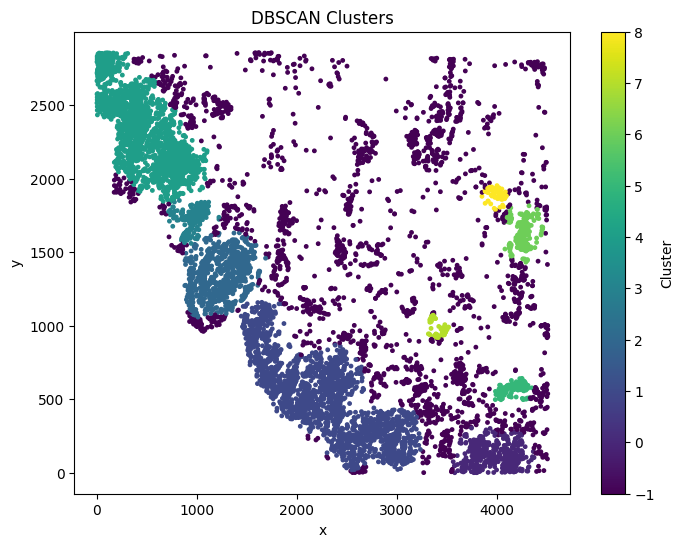

In [28]:
plt.figure(figsize=(8, 6))
plt.title("DBSCAN Clusters")
plt.scatter(Data['X_Parameter'], Data['Y_Parameter'], c=Data['cluster_dbscan'], cmap='viridis', s=6)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Cluster')
plt.show()

<h2>K-Means</h2>
Let's try to use K-means algorithm to fin automatic cluster and see if there is coincidence with DBSCAN or the original data.

K-means is better for find more regular clusters using de number of cluster as parameter.



In [29]:
kmeans = KMeans(n_clusters=8, random_state=0)

# Applying K-Means
labels_kmeans = kmeans.fit_predict(coords_scaled)

# Add results to the DataFrame
Data['cluster_kmeans'] = labels_kmeans

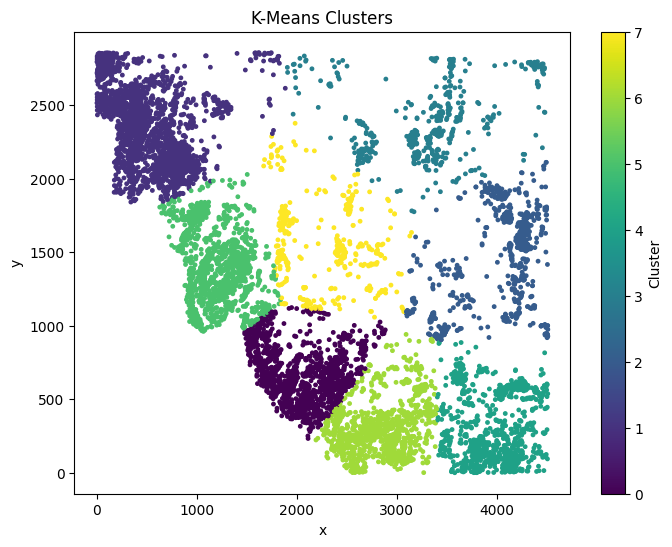

In [30]:
#Plot results
plt.figure(figsize=(8, 6))
plt.title("K-Means Clusters")
plt.scatter(Data['X_Parameter'], Data['Y_Parameter'], c=Data['cluster_kmeans'], cmap='viridis', s=6)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Cluster')
plt.show()

<h2>Appliyung MIC</h2>

 Maximal information coefficient (MIC) is a measure of the strength of the linear or non-linear association between two variables X and Y especially useful when the form of the relationship is unknown.

The MIC score ranges from 0 to 1:
<br>
<br>
0: No relationship between variables.
<br><br>
1: A perfect deterministic relationship.

Is a powerful tool for uncovering and quantifying relationships in complex datasets where traditional correlation measures might fail. It is especially useful in fields where the relationships between variables are intricate and not well understood

In [38]:
# Create object MIC
mine = MINE()

#Create scaler
scaler = MinMaxScaler()

# obtaining unique clases
clases = Data['SampleID'].unique()

# Matrix for the MIC for each class comparation
mic_matrix = np.zeros((len(clases), len(clases)))

# Computing MIC for every class vs every class
for i, clase_i in enumerate(clases):
    for j, clase_j in enumerate(clases):
        # getting data per class
        datos_clase_i = Data[Data['SampleID'] == clase_i]
        datos_clase_j = Data[Data['SampleID'] == clase_j]

        # Mixing data per class
        x_comb = pd.concat([datos_clase_i['X_Parameter'], datos_clase_j['X_Parameter']])
        y_comb = pd.concat([datos_clase_i['Y_Parameter'], datos_clase_j['Y_Parameter']])

        # Compute MIC
        mine.compute_score(x_comb, y_comb)
        mic_matrix[i, j] = mine.mic()

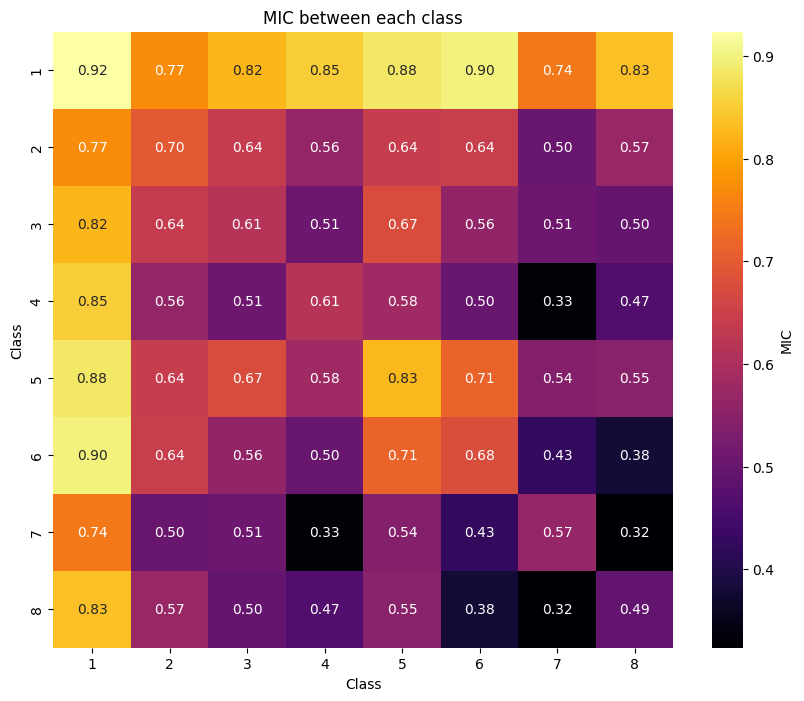

In [39]:
# generating DataFrame for the heatmap creation
mic_df = pd.DataFrame(mic_matrix, index=clases, columns=clases)

# Showing the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mic_df, annot=True, fmt=".2f", cmap="inferno", cbar_kws={'label': 'MIC'})
plt.title("MIC between each class")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()